# EXPLORATORY DATA ANALYSIS (EDA) with PYTHON PANDAS

STEP 1: BASIC DATA UNDERSTANDING
- Dataframe shape
- head and tail
- dtypes
- describe
- value counts

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("classic")
sns.set(style="darkgrid", font_scale=1.1)
pd.set_option('display.max_rows', 161)

In [4]:
try:
    df = pd.read_csv('weather_data.csv')
    print("Berhasil membaca data")
except Exception as e:
    print(f"Gagal membaca data a {e}")

Berhasil membaca data


In [5]:
df.shape

(161, 10)

In [6]:
df.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
5,6,28.0,NaN,14.9,66,5,6,2025,66,C
6,7,23.0,299.0,8.6,65,5,7,2025,65,PS
7,8,19.0,99.0,13.8,59,5,8,2025,59,C
8,9,8.0,19.0,20.1,61,5,9,2025,61,PS
9,10,NaN,194.0,8.6,69,5,10,2025,69,S


In [7]:
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [8]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S


In [9]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [11]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,161.00,80.39,46.12,1.00,41.00,80.00,120.00,158.00
Ozone,123.00,41.84,32.67,1.00,18.00,31.00,62.00,168.00
Solar.R,154.00,185.64,88.24,7.00,121.75,195.50,257.50,334.00
Wind,161.00,9.90,3.50,1.70,7.40,9.70,11.50,20.70
Day,161.00,15.95,9.07,1.00,8.00,16.00,24.00,31.00
Year,161.00,2025.00,0.00,2025.00,2025.00,2025.00,2025.00,2025.00
Temp,161.00,77.74,9.40,56.00,72.00,78.00,84.00,97.00


In [12]:
df.describe(include='object')

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,81,9,S
freq,11,35,59


INSIGHT STEP-1:
- Kolom Temp C berbentuk Object yang seharusnya Integer
- Kolom Month berbentuk Object yang seharusnya Datetime

STEP 2: DATA PREPARATION
- Dropping duplicate rows
- Dropping irrelevant columns
- Identifying duplicated columns
- Renaming columns
- Handling Missing Values
- Creating Date columns
- Outlier Detection

In [13]:
df.loc[df.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [14]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [15]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
5,6,28.0,NaN,14.9,66,5,6,2025,66,C
6,7,23.0,299.0,8.6,65,5,7,2025,65,PS
7,8,19.0,99.0,13.8,59,5,8,2025,59,C
8,9,8.0,19.0,20.1,61,5,9,2025,61,PS
9,10,NaN,194.0,8.6,69,5,10,2025,69,S


In [16]:
df = df.drop(["Unnamed: 0", "Temp C"], axis=1)

In [17]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
5,28.0,NaN,14.9,5,6,2025,66,C
6,23.0,299.0,8.6,5,7,2025,65,PS
7,19.0,99.0,13.8,5,8,2025,59,C
8,8.0,19.0,20.1,5,9,2025,61,PS
9,NaN,194.0,8.6,5,10,2025,69,S


In [18]:
df = df.rename({"Solar.R":"Solar"}, axis=1)

In [19]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
5,28.0,NaN,14.9,5,6,2025,66,C
6,23.0,299.0,8.6,5,7,2025,65,PS
7,19.0,99.0,13.8,5,8,2025,59,C
8,8.0,19.0,20.1,5,9,2025,61,PS
9,NaN,194.0,8.6,5,10,2025,69,S


In [20]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [21]:
mean = df["Solar"].mean().round()

In [22]:
df["Solar"] = df["Solar"].fillna(mean)

In [23]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
5,28.0,185.0,14.9,5,6,2025,66,C
6,23.0,299.0,8.6,5,7,2025,65,PS
7,19.0,99.0,13.8,5,8,2025,59,C
8,8.0,19.0,20.1,5,9,2025,61,PS
9,NaN,194.0,8.6,5,10,2025,69,S


In [24]:
df["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [25]:
df["Month"] = df["Month"].replace({"May":'5'})

In [26]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
5,28.0,185.0,14.9,5,6,2025,66,C
6,23.0,299.0,8.6,5,7,2025,65,PS
7,19.0,99.0,13.8,5,8,2025,59,C
8,8.0,19.0,20.1,5,9,2025,61,PS
9,NaN,194.0,8.6,5,10,2025,69,S


In [27]:
df.head(6)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
5,28.0,185.0,14.9,5,6,2025,66,C


In [28]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [29]:
df.head(5)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05


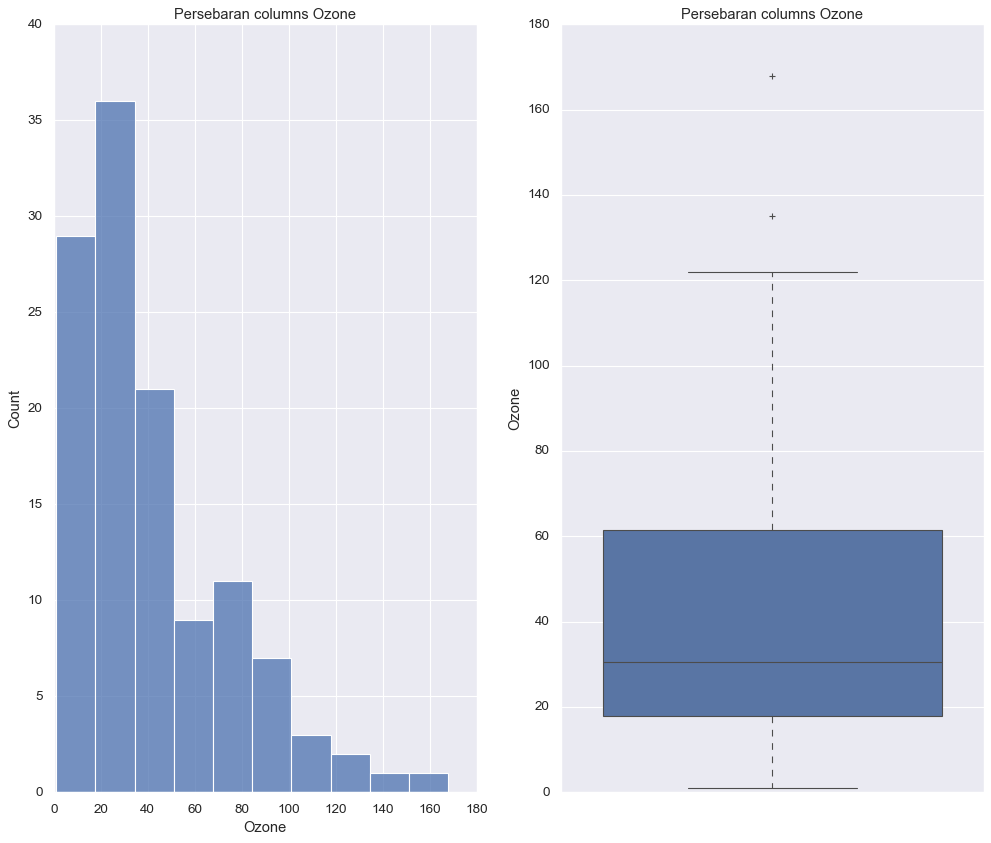

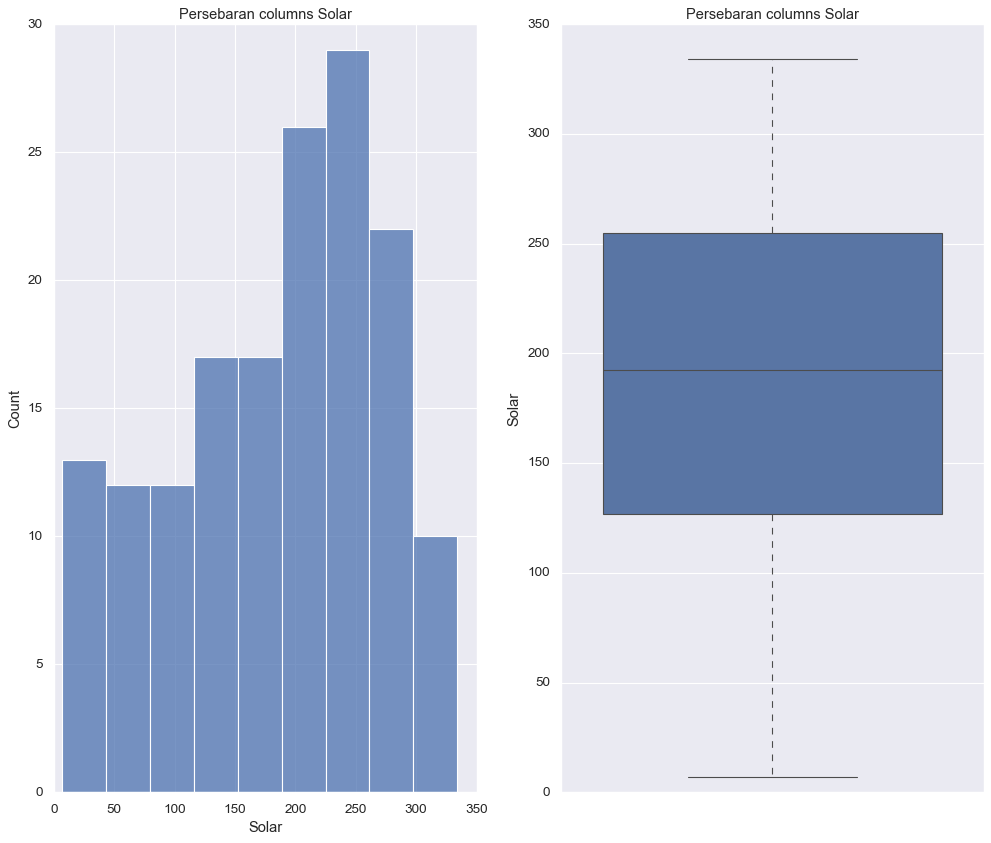

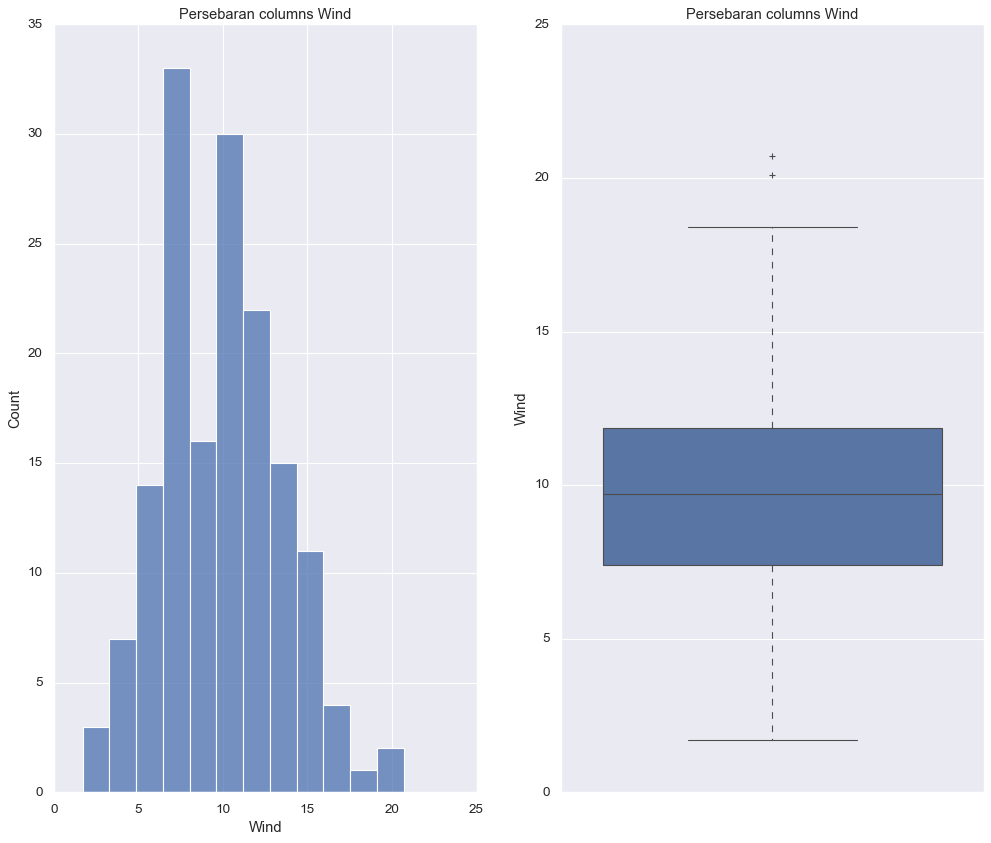

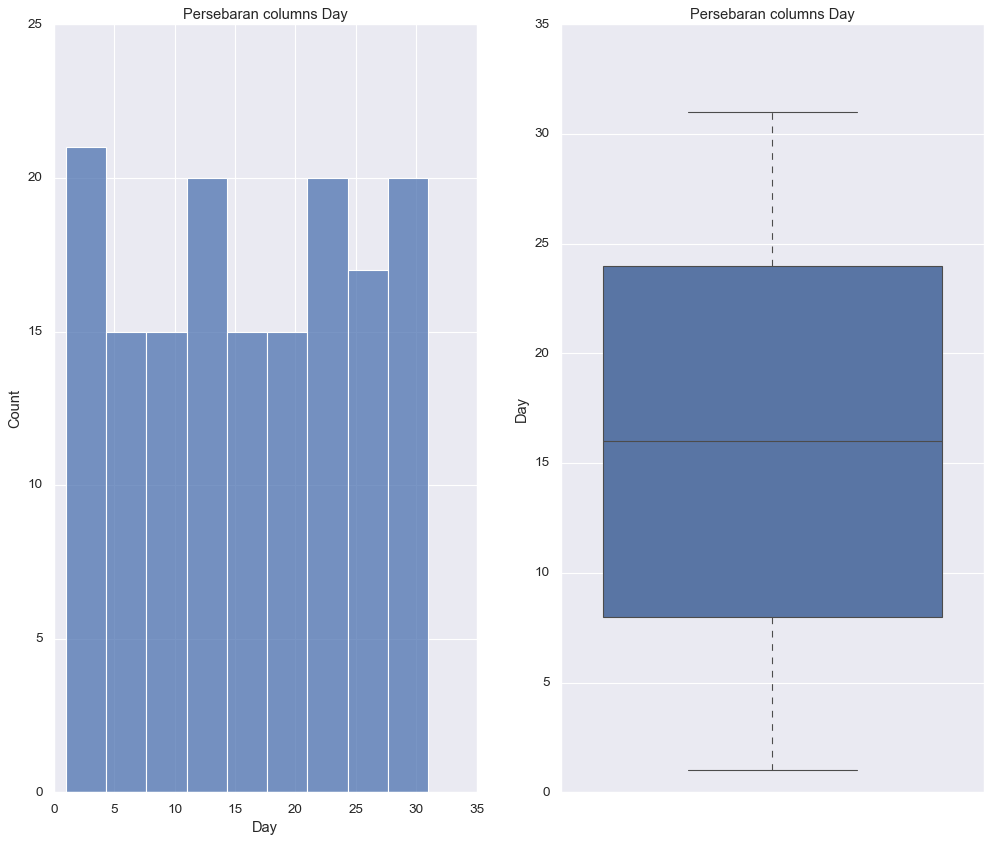

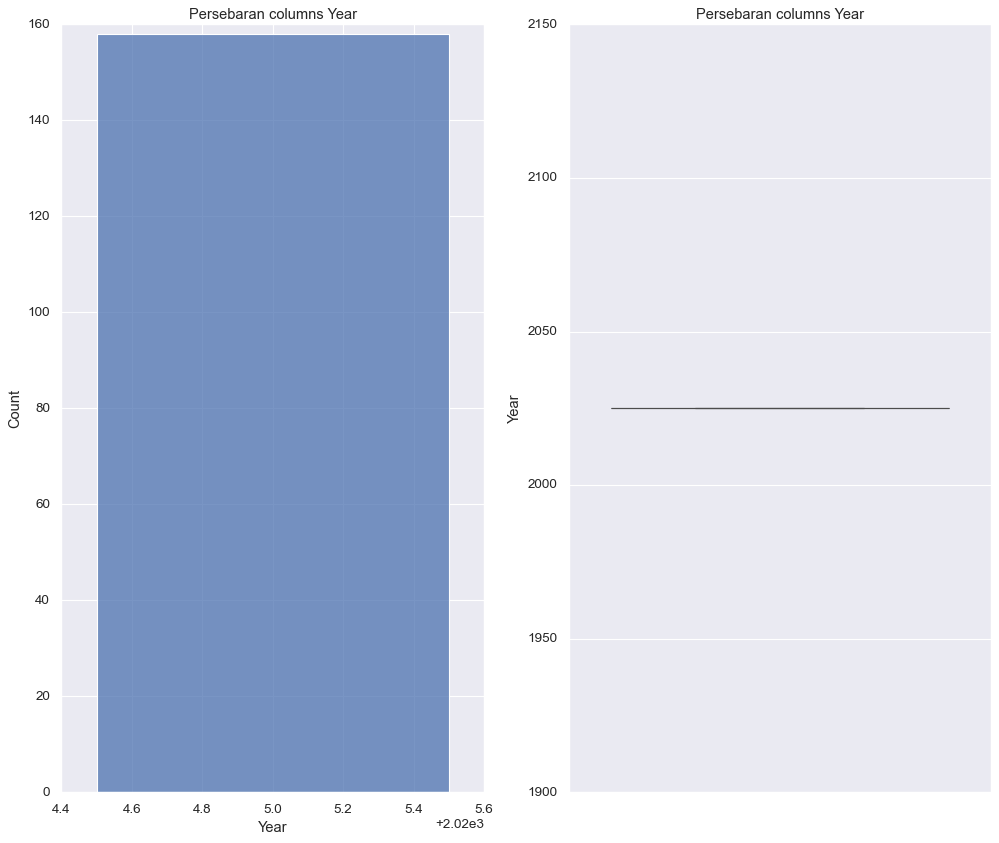

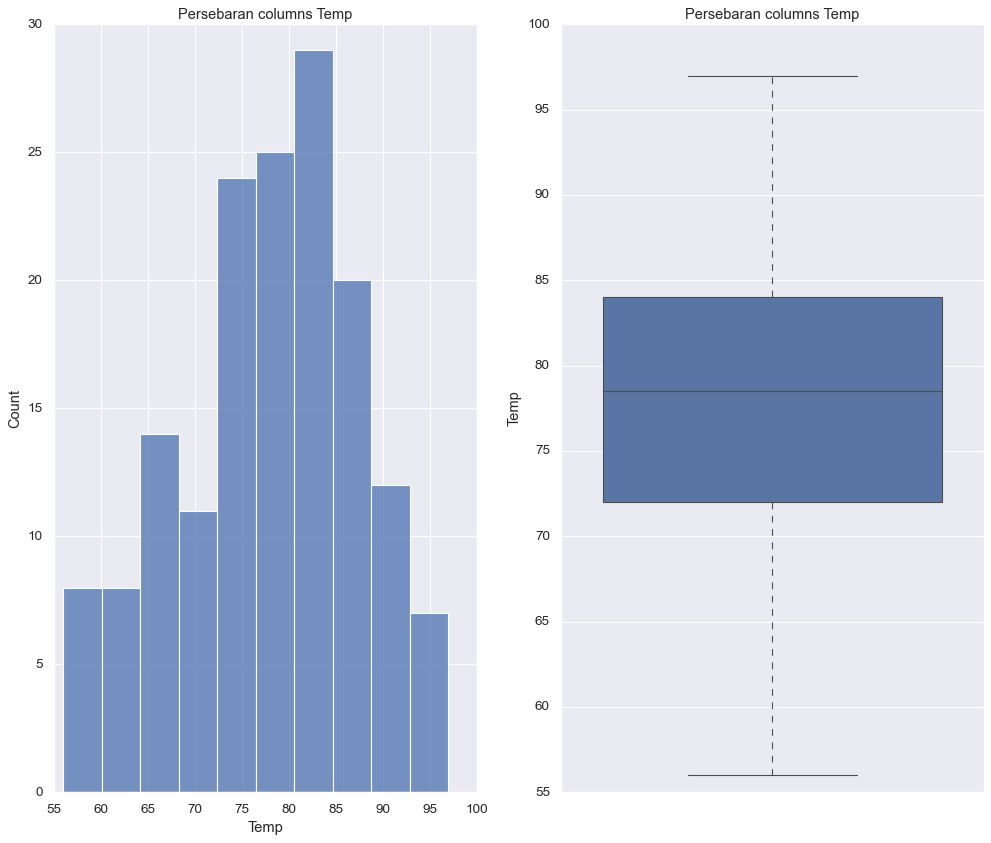

In [30]:
numcols = df.select_dtypes(include='number')
for cols in numcols:
    fig, axes = plt.subplots(1,2, figsize=(15, 12))
    sns.histplot(df[cols], ax = axes[0])
    axes[0].set_title(f"Persebaran columns {cols}")
    
    sns.boxplot(df[cols], ax = axes[1])
    axes[1].set_title(f"Persebaran columns {cols}")
    
    plt.show()

In [31]:
df["Ozone"].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [32]:
IQR = 61.500000 - 18.000000
max_limit = 61.500000 + 1.5 * IQR
max_limit

126.75

In [33]:
df[df["Ozone"]>max_limit]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
116,168.0,238.0,3.4,8,25,2025,81,PS,2025-08-25


INSIGHT STEP-2:
- Merubah nama kolom "Solar" 
- Mengisi data hilang di kolom "Solar" dengan Mean
- Merubah unique value di "Month" dari May -> 5
- Membuat kolom baru bernama "Date" dari gabungan 3 kolom ("Year", "Month", "Day")

STEP 3: UNIVARIATE ANALYSIS (FEATURE UNDERSTANDING)
- Analyzing Categorical Features
    - Value Counts, Bar Charts
- Analyzing Numerical Features
    - Mean, Median, Mode, Variance, Skewness, Kurtosis
    - Histograms, Boxplots, Violin Plots
- Feature Distributions
    - KDE Plots
    - Distribution Plots (Seaborn, Plotly)

In [34]:
df.dtypes

Ozone             float64
Solar             float64
Wind              float64
Month              object
Day                 int64
Year                int64
Temp                int64
Weather            object
Date       datetime64[ns]
dtype: object

<Axes: xlabel='Month'>

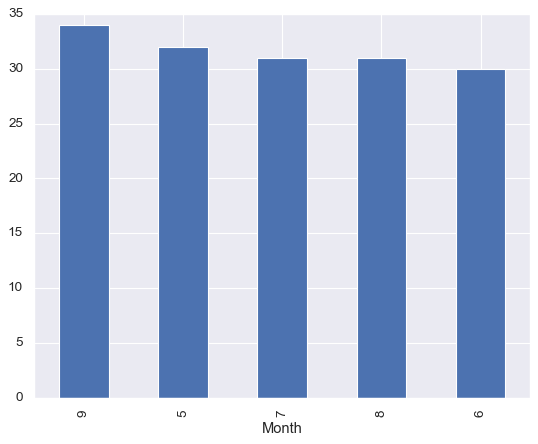

In [35]:
df["Month"].value_counts().plot(kind='bar')

#Mean, Median, Mode, Variance, Skewness, Kurtosis

In [36]:
df.describe()

,Ozone,Solar,Wind,Day,Year,Temp,Date
count,120.000000,158.000000,158.000000,158.000000,158.0,158.000000,158
mean,41.583333,185.386076,9.957595,16.006329,2025.0,77.727848,2025-07-17 09:06:50.126582272
min,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000,2025-05-01 00:00:00
25%,18.000000,127.000000,7.400000,8.000000,2025.0,72.000000,2025-06-08 06:00:00
50%,30.500000,192.500000,9.700000,16.000000,2025.0,78.500000,2025-07-17 12:00:00
75%,61.500000,255.000000,11.875000,24.000000,2025.0,84.000000,2025-08-25 18:00:00
max,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000,2025-09-30 00:00:00
std,32.620709,86.722687,3.511261,8.997166,0.0,9.377877,NaN


In [37]:
df.var(numeric_only=True)

Ozone    1064.110644
Solar    7520.824518
Wind       12.328955
Day        80.949004
Year        0.000000
Temp       87.944570
dtype: float64

In [38]:
df.skew(numeric_only=True)

Ozone    1.282000
Solar   -0.425459
Wind     0.349332
Day     -0.036407
Year     0.000000
Temp    -0.340108
dtype: float64

<Axes: ylabel='Frequency'>

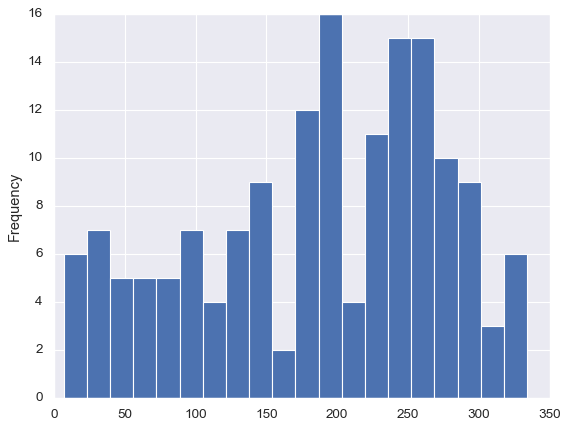

In [39]:
df["Solar"].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

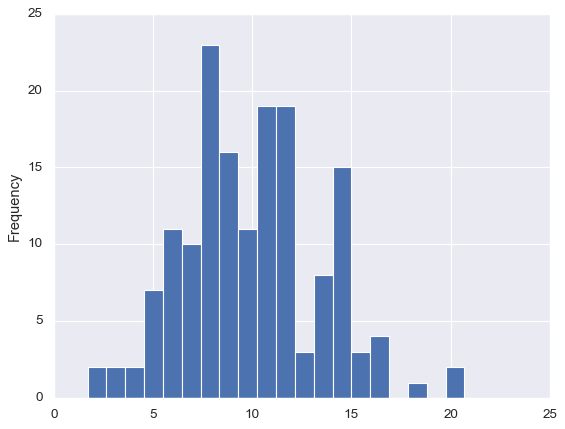

In [40]:
df["Wind"].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

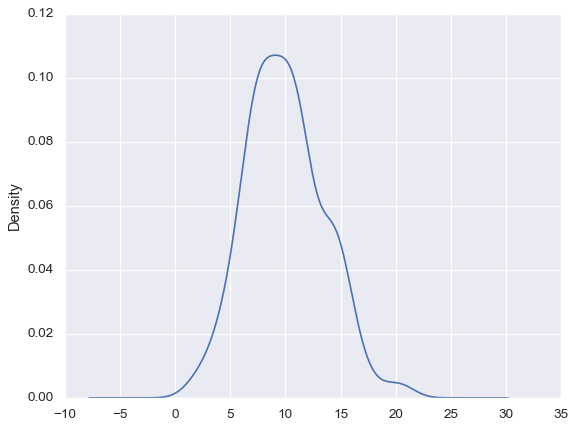

In [41]:
df["Wind"].plot(kind='kde')

<Axes: >

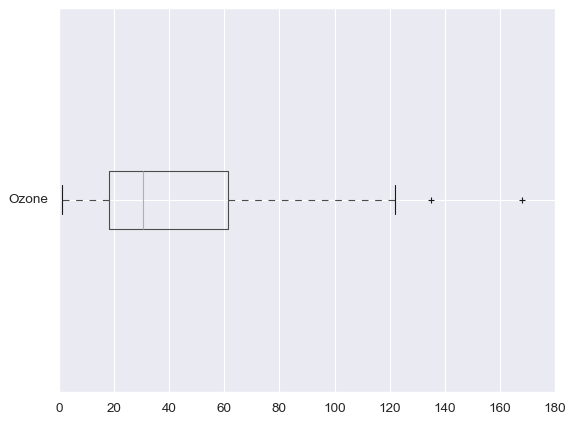

In [42]:
df.boxplot(column="Ozone", vert=False)

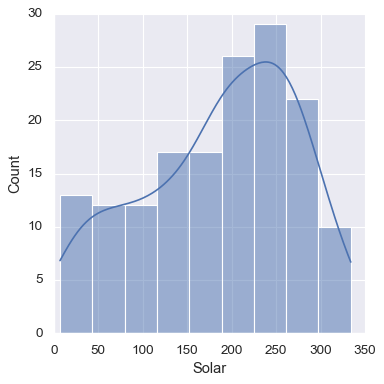

In [43]:
sns.displot(data=df, x='Solar', kind='hist', kde=True)

<Axes: xlabel='Solar'>

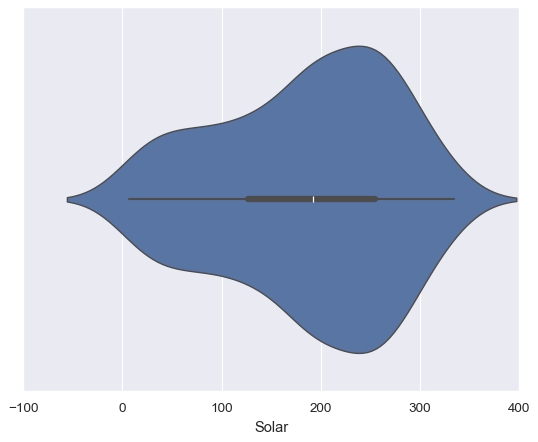

In [44]:
sns.violinplot(data=df, x="Solar")

INSIGHT STEP-3:
- Nilai tengah kolom "Solar" berkisar antara 200-300
- Outlier di kolom ozone diantara rentang 135 - 175
- Nilai tengah columns Wind Tersebar diantara 5 - 15

STEP 4: BIVARIATE AND MULTIVARIATE ANALYSIS (FEATURE RELATIONSHIPS)
- Numerical vs Numerical
    - Scatterplots, Correlation Matrix (heatmap), Pairplots
- Categorical vs Numerical
    - Boxplots, Vionlinplots, Barplots
- Categorical vs Categorical
    - Crosstabs
- Date vs Numerical
- Grouped Statistics with .groupby()

<Axes: xlabel='Ozone', ylabel='Temp'>

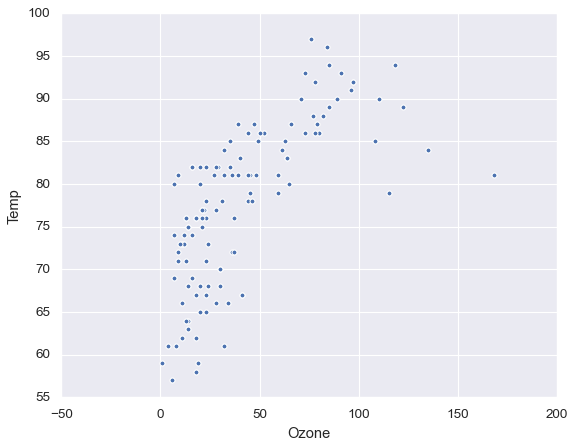

In [45]:
df.plot(kind="scatter", x="Ozone", y="Temp")

<Axes: xlabel='Ozone', ylabel='Temp'>

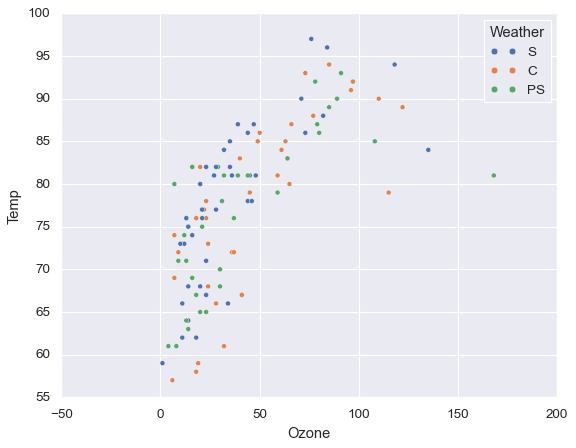

In [46]:
sns.scatterplot(data=df, x="Ozone", y="Temp", hue="Weather")

In [47]:
df1 = df.drop(["Year"], axis=1)
df1

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,56,S,2025-05-05
5,28.0,185.0,14.9,5,6,66,C,2025-05-06
6,23.0,299.0,8.6,5,7,65,PS,2025-05-07
7,19.0,99.0,13.8,5,8,59,C,2025-05-08
8,8.0,19.0,20.1,5,9,61,PS,2025-05-09
9,NaN,194.0,8.6,5,10,69,S,2025-05-10


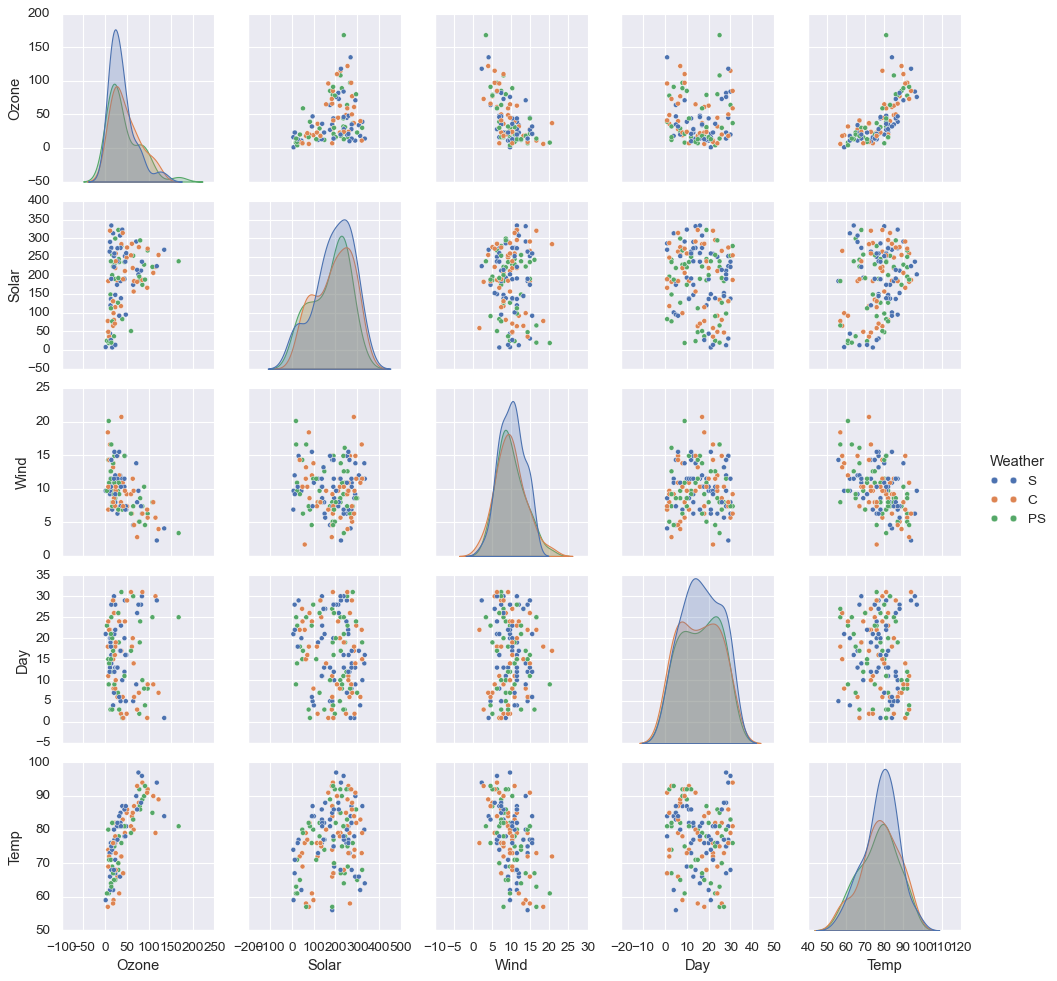

In [48]:
sns.pairplot(data=df1, hue="Weather")

In [49]:
df1.corr(numeric_only=True)

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.344013,-0.593530,-0.035055,0.694098
Solar,0.344013,1.000000,-0.055036,-0.149447,0.260577
Wind,-0.593530,-0.055036,1.000000,0.040151,-0.441247
Day,-0.035055,-0.149447,0.040151,1.000000,-0.124538
Temp,0.694098,0.260577,-0.441247,-0.124538,1.000000


<Axes: >

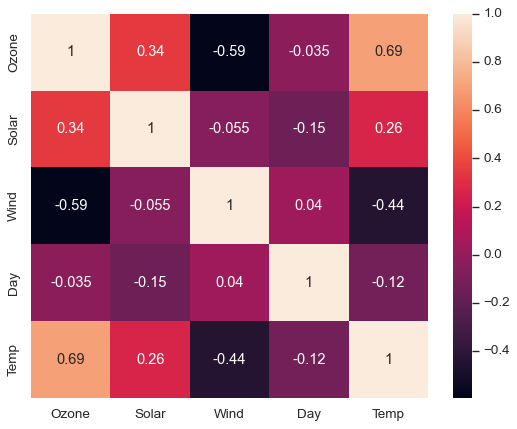

In [50]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)

<Axes: xlabel='Ozone', ylabel='Weather'>

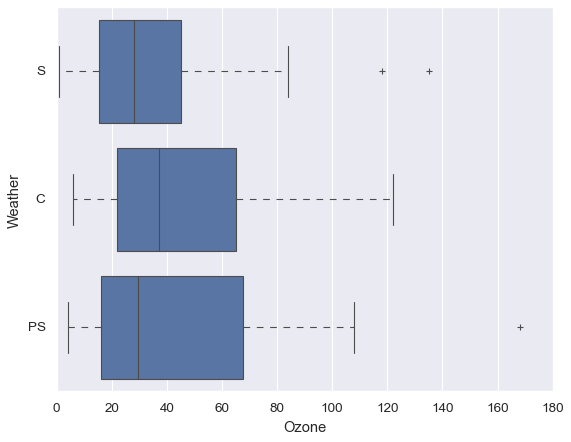

In [51]:
sns.boxplot(data=df, x="Ozone", y="Weather")

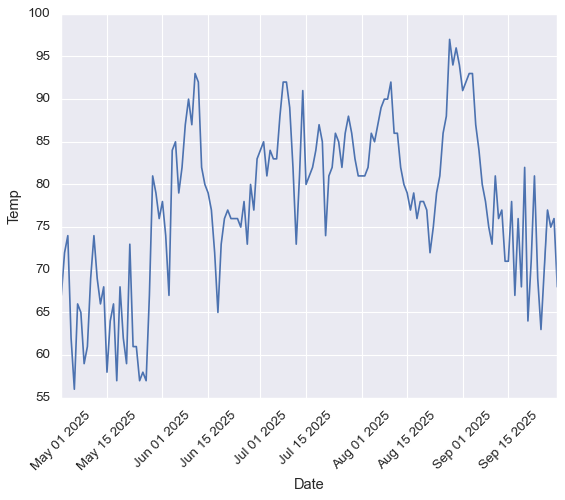

In [52]:
sns.lineplot(data=df, x="Date", y="Temp")
plt.xticks(rotation = 45)
plt.show()

In [53]:
pd.crosstab(df["Month"], df["Weather"])

Weather,C,PS,S
Month,,,
5,11,9,12
6,9,9,12
7,11,8,11
8,10,8,11
9,8,13,13


In [54]:
df.groupby("Weather").mean(numeric_only=True)

,Ozone,Solar,Wind,Day,Year,Temp
Weather,,,,,,
C,46.162162,191.938776,9.783673,15.489796,2025.0,77.734694
PS,42.194444,174.574468,9.908511,16.042553,2025.0,76.872340
S,36.909091,193.050847,10.093220,16.661017,2025.0,78.067797


In [55]:
df[df["Weather"] =="S"].mean(numeric_only=True)

Ozone      36.909091
Solar     193.050847
Wind       10.093220
Day        16.661017
Year     2025.000000
Temp       78.067797
dtype: float64

In [56]:
df[(df["Month"] =='6') & (df["Weather"] =="C")]["Temp"].mean(numeric_only=True).__round__()

78

In [57]:
df[(df["Month"] =='7') & (df["Weather"] =="S")]["Temp"].max(numeric_only=True)

np.int64(88)

In [58]:
df["Temp"].head(161)

0      67
1      72
2      74
3      62
4      56
5      66
6      65
7      59
8      61
9      69
10     74
11     69
12     66
13     68
14     58
15     64
16     66
17     57
18     68
19     62
20     59
21     73
22     61
23     61
24     57
25     58
26     57
27     67
28     81
29     79
30     76
31     78
32     74
33     67
34     84
35     85
36     79
37     82
38     87
39     90
40     87
41     93
42     92
43     82
44     80
45     79
46     77
47     72
48     65
49     73
50     76
51     77
52     76
53     76
54     76
55     75
56     78
57     73
58     80
59     77
60     83
61     84
62     85
63     81
64     84
65     83
66     83
67     88
68     92
69     92
70     89
71     82
72     73
73     81
74     91
75     80
76     81
77     82
78     84
79     87
80     85
81     74
82     81
83     82
84     86
85     85
86     82
87     86
88     88
89     86
90     83
91     81
92     81
93     81
94     82
95     86
96     85
97     87
98     89
99     90


In [59]:
df.to_csv("Weather_predict.csv")

In [60]:
mean_ozone = df["Ozone"].mean().__round__()

In [61]:
df["Ozone"] = df["Ozone"].fillna(mean_ozone)

In [62]:
df["Ozone"]

0       41.0
1       36.0
2       12.0
3       18.0
4       42.0
5       28.0
6       23.0
7       19.0
8        8.0
9       42.0
10       7.0
11      16.0
12      11.0
13      14.0
14      18.0
15      14.0
16      34.0
17       6.0
18      30.0
19      11.0
20       1.0
21      11.0
22       4.0
23      32.0
24      42.0
25      42.0
26      42.0
27      23.0
28      45.0
29     115.0
30      37.0
31      42.0
32      42.0
33      42.0
34      42.0
35      42.0
36      42.0
37      29.0
38      42.0
39      71.0
40      39.0
41      42.0
42      42.0
43      23.0
44      42.0
45      42.0
46      21.0
47      37.0
48      20.0
49      12.0
50      13.0
51      42.0
52      42.0
53      42.0
54      42.0
55      42.0
56      42.0
57      42.0
58      42.0
59      42.0
60      42.0
61     135.0
62      49.0
63      32.0
64      42.0
65      64.0
66      40.0
67      77.0
68      97.0
69      97.0
70      85.0
71      42.0
72      10.0
73      27.0
74      42.0
75       7.0
76      48.0

In [63]:
df.shape

(158, 9)

<Axes: >

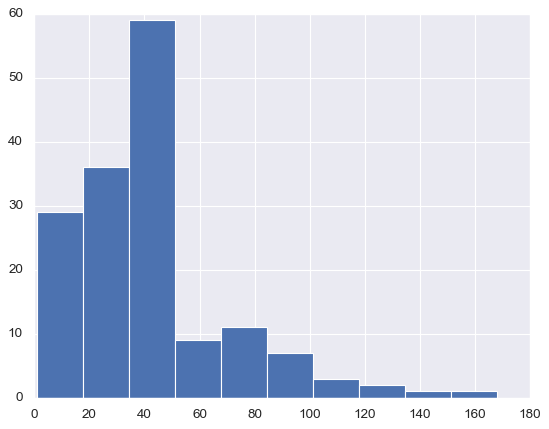

In [64]:
df['Ozone'].hist()

In [ ]:
q1 = df["Ozone"].quantile(0.25)
q3 = df["Ozone"].quantile(0.75)

q1, q3

(np.float64(21.0), np.float64(45.0))

In [66]:
iqr = q3 - q1
iqr

np.float64(24.0)

In [67]:
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
lb, ub

(np.float64(-15.0), np.float64(81.0))

In [68]:
df[(df['Ozone'] < lb) | (df["Ozone"] > ub)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
29,115.0,223.0,5.7,5,30,2025,79,C,2025-05-30
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
68,97.0,267.0,6.3,7,8,2025,92,PS,2025-07-08
69,97.0,272.0,5.7,7,9,2025,92,C,2025-07-09
70,85.0,175.0,7.4,7,10,2025,89,PS,2025-07-10
85,108.0,223.0,8.0,7,25,2025,85,PS,2025-07-25
88,82.0,213.0,7.4,7,28,2025,88,S,2025-07-28
98,122.0,255.0,4.0,8,7,2025,89,C,2025-08-07
99,89.0,229.0,10.3,8,8,2025,90,PS,2025-08-08
100,110.0,207.0,8.0,8,9,2025,90,C,2025-08-09


In [69]:
no_outliers = df[(df['Ozone'] > lb) & (df["Ozone"] < ub)]
no_outliers

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,42.0,185.0,14.3,5,5,2025,56,S,2025-05-05
5,28.0,185.0,14.9,5,6,2025,66,C,2025-05-06
6,23.0,299.0,8.6,5,7,2025,65,PS,2025-05-07
7,19.0,99.0,13.8,5,8,2025,59,C,2025-05-08
8,8.0,19.0,20.1,5,9,2025,61,PS,2025-05-09
9,42.0,194.0,8.6,5,10,2025,69,S,2025-05-10


<Axes: >

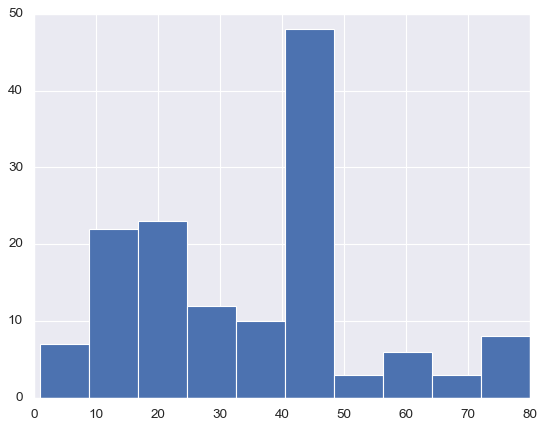

In [70]:
no_outliers['Ozone'].hist()

In [71]:
no_outliers.to_csv("Weather_Predict_Fix.csv")